# Part 1

In [1]:
# Import of different libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# To encode categorical features
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image

In [2]:
df_orders = pd.read_csv('data/olist_orders_dataset.csv', low_memory = False)
df_products = pd.read_csv('data/olist_products_dataset.csv', low_memory = False)
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv', low_memory = False)
df_orders_payment = pd.read_csv('data/olist_order_payments_dataset.csv', low_memory = False)
df_customers = pd.read_csv('data/olist_customers_dataset.csv', low_memory = False)
df_product_category = pd.read_csv('data/product_category_name_translation.csv', low_memory = False)
df_orders_review = pd.read_csv('data/olist_order_reviews_dataset.csv', low_memory = False)
df_orders_items = pd.read_csv('data/olist_order_items_dataset.csv', low_memory = False)

![title](images/olist_data.png) 

In [3]:
df_items_product = pd.merge(df_orders_items, df_products, on= 'product_id', how = 'left')
df_items_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [4]:
df_payments_orders = pd.merge(df_orders_payment, df_orders, on='order_id', how ='left')
df_payments_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [5]:
df_payments_order_customer = pd.merge(df_payments_orders, df_customers, on='customer_id', how='left' )
df_payments_order_customer.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [6]:
df_payments_order_customer_review = pd.merge(df_payments_order_customer, df_orders_review, on='order_id', how='left')
df_payments_order_customer_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39


In [7]:
df_payments_order_customer_review_products = pd.merge(df_items_product, df_payments_order_customer_review, 
                                                      on = 'order_id', how='left')
df_payments_order_customer_review_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [8]:
df_merged = pd.merge(df_payments_order_customer_review_products, df_sellers, on='seller_id', how='left')
df_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR


In [9]:
df_merged.shape

(118318, 39)

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118318 non-null  object 
 1   order_item_id                  118318 non-null  int64  
 2   product_id                     118318 non-null  object 
 3   seller_id                      118318 non-null  object 
 4   shipping_limit_date            118318 non-null  object 
 5   price                          118318 non-null  float64
 6   freight_value                  118318 non-null  float64
 7   product_category_name          116609 non-null  object 
 8   product_name_lenght            116609 non-null  float64
 9   product_description_lenght     116609 non-null  float64
 10  product_photos_qty             116609 non-null  float64
 11  product_weight_g               118298 non-null  float64
 12  product_length_cm             

# Part 2

In [11]:
df_merged['price_group'] = (df_merged['price']/100).astype(int)
df_merged['installment_value'] = round(df_merged['payment_value']/df_merged['payment_installments'],2)
df_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,0,12.89
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,1,72.68


In [12]:
pd.set_option('display.max_columns', 500)
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,0,12.89
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,1,72.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118313,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,boleto,1.0,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:5

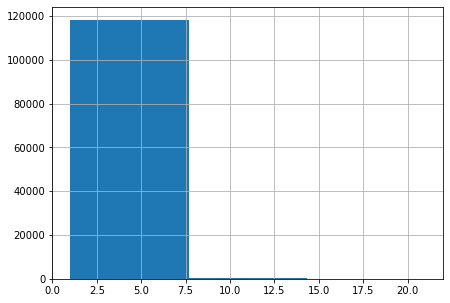

In [13]:
df_merged['order_item_id'].hist(bins = 3, figsize = (7,5))
plt.show()

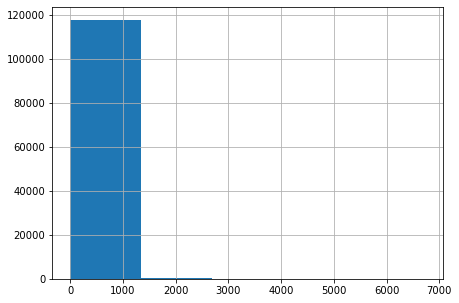

In [14]:
df_merged['price'].hist(bins = 5, figsize = (7,5))
plt.show()

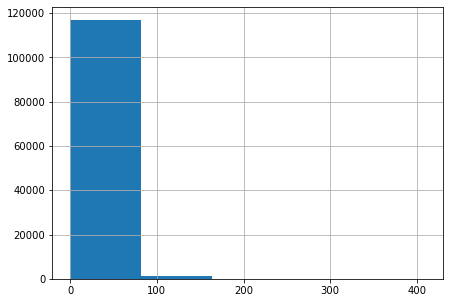

In [15]:
df_merged['freight_value'].hist(bins = 5, figsize = (7,5))
plt.show()

In [16]:
df_merged['product_category_name'].value_counts()

cama_mesa_banho                                  11990
beleza_saude                                     10033
esporte_lazer                                     9005
moveis_decoracao                                  8833
informatica_acessorios                            8151
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: product_category_name, Length: 73, dtype: int64

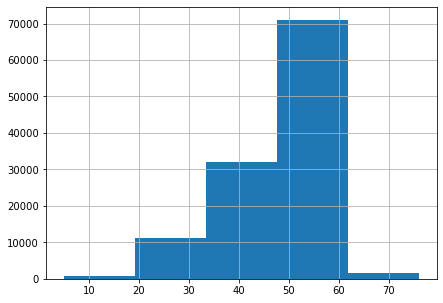

In [17]:
df_merged['product_name_lenght'].hist(bins = 5, figsize = (7,5))
plt.show()

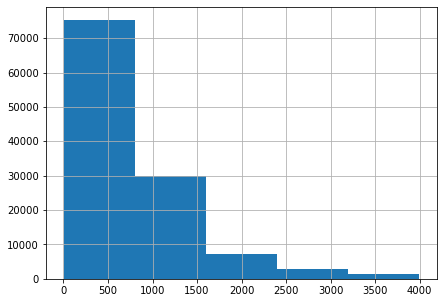

In [18]:
df_merged['product_description_lenght'].hist(bins = 5, figsize = (7,5))
plt.show()

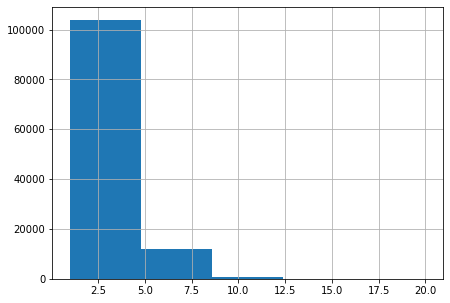

In [19]:
df_merged['product_photos_qty'].hist(bins = 5, figsize = (7,5))
plt.show()

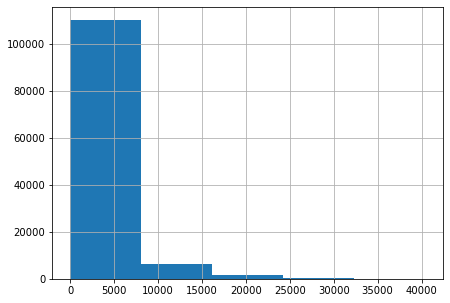

In [20]:
df_merged['product_weight_g'].hist(bins = 5, figsize = (7,5))
plt.show()

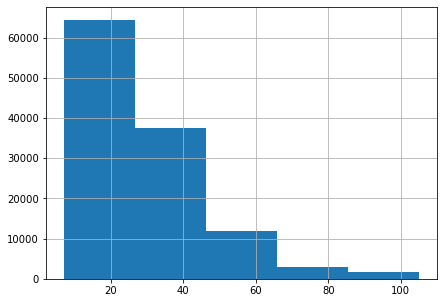

In [21]:
df_merged['product_length_cm'].hist(bins = 5, figsize = (7,5))
plt.show()

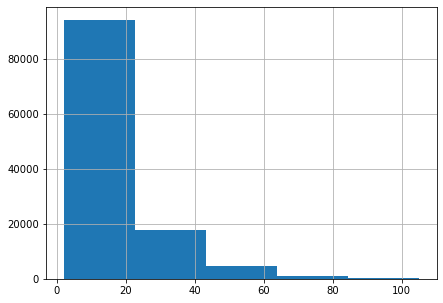

In [22]:
df_merged['product_height_cm'].hist(bins = 5, figsize = (7,5))
plt.show()

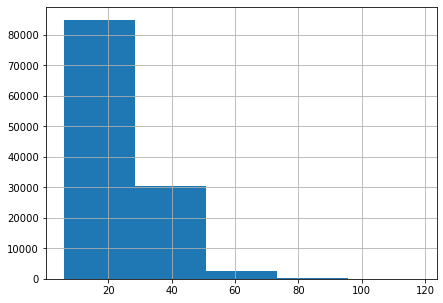

In [23]:
df_merged['product_width_cm'].hist(bins = 5, figsize = (7,5))
plt.show()

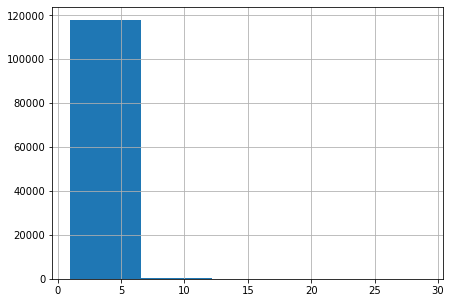

In [24]:
df_merged['payment_sequential'].hist(bins = 5, figsize = (7,5))
plt.show()

In [25]:
df_merged['payment_type'].value_counts()

credit_card    87266
boleto         23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64

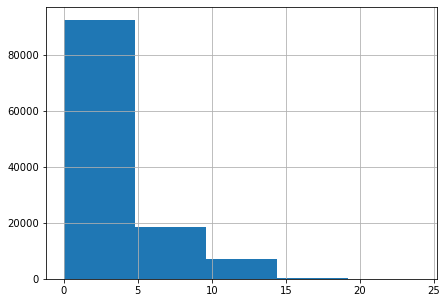

In [26]:
df_merged['payment_installments'].hist(bins = 5, figsize = (7,5))
plt.show()

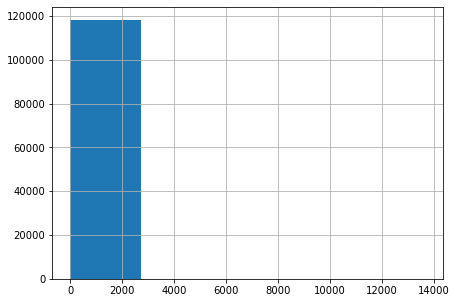

In [27]:
df_merged['payment_value'].hist(bins = 5, figsize = (7,5))
plt.show()

In [28]:
df_merged['order_status'].value_counts()

delivered      115728
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

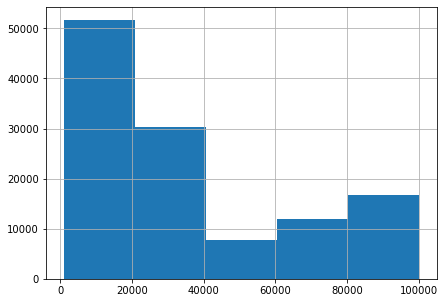

In [29]:
df_merged['customer_zip_code_prefix'].hist(bins = 5, figsize = (7,5))
plt.show()

In [30]:
df_merged['customer_city'].value_counts()

sao paulo                18728
rio de janeiro            8261
belo horizonte            3274
brasilia                  2484
curitiba                  1816
                         ...  
santo antonio do taua        1
oleo                         1
itanhanga                    1
silvanopolis                 1
pouso novo                   1
Name: customer_city, Length: 4110, dtype: int64

In [31]:
df_merged['customer_state'].value_counts()

SP    49865
RJ    15425
MG    13718
RS     6539
PR     5988
SC     4319
BA     4069
DF     2500
GO     2453
ES     2351
PE     1903
CE     1556
MT     1128
PA     1124
MS      856
MA      849
PB      640
PI      574
RN      571
AL      462
SE      397
TO      339
RO      286
AM      172
AC       95
AP       84
RR       52
Name: customer_state, dtype: int64

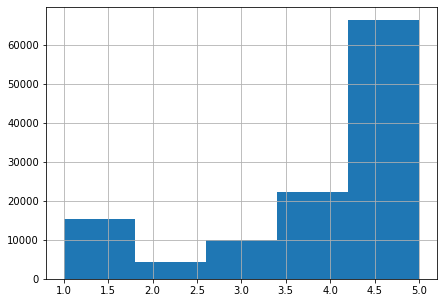

In [32]:
df_merged['review_score'].hist(bins = 5, figsize = (7,5))
plt.show()

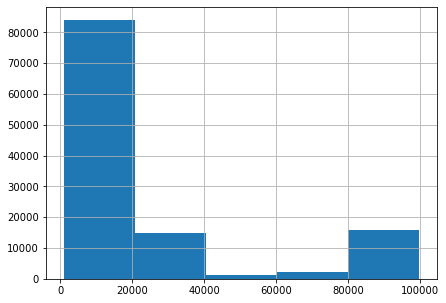

In [33]:
df_merged['seller_zip_code_prefix'].hist(bins = 5, figsize = (7,5))
plt.show()

In [34]:
df_merged['seller_city'].value_counts()

sao paulo                29294
ibitinga                  8375
curitiba                  3161
santo andre               3149
sao jose do rio preto     2693
                         ...  
sao pauo                     1
paracambi                    1
sapiranga                    1
tambau                       1
imigrante                    1
Name: seller_city, Length: 611, dtype: int64

In [35]:
df_merged['seller_state'].value_counts()

SP    84384
MG     9314
PR     9097
RJ     5036
SC     4271
RS     2294
DF      949
BA      700
GO      550
PE      465
MA      410
ES      390
MT      147
CE      103
MS       60
RN       56
PB       44
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: seller_state, dtype: int64

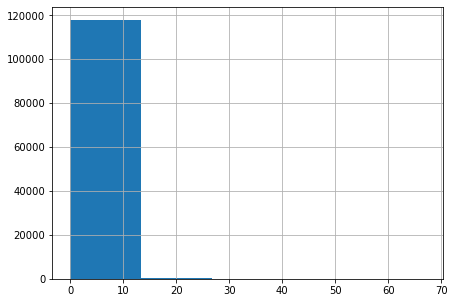

In [36]:
df_merged['price_group'].hist(bins = 5, figsize = (7,5))
plt.show()

In [37]:
df_merged.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score,seller_zip_code_prefix,price_group,installment_value
count,118318.000000,118318.000000,118318.000000,116609.000000,116609.000000,116609.000000,118298.000000,118298.000000,118298.000000,118298.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118318.000000,118318.000000,118315.00
mean,1.196530,120.649109,20.032587,48.767402,785.950441,2.205113,2112.302803,30.264865,16.619994,23.074896,1.094062,2.943498,172.575651,35051.681579,4.014554,24442.245322,0.710872,inf
std,0.699467,184.107686,15.836559,10.033526,652.571474,1.717418,3786.673988,16.188992,13.453771,11.749216,0.728555,2.778022,267.104661,29824.811223,1.400186,27572.843192,1.808538,NaN
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1003.000000,1.000000,1001.000000,0.000000,0.00
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.850000,11310.000000,3.000000,6429.000000,0.000000,27.50
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.200000,24310.000000,5.000000,13660.000000,0.000000,53.62
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.260000,58640.000000,5.000000,27972.000000,1.000000,97.18
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99990.000000,5.000000,99730.000000,67.000000,inf


# Part 3

In [38]:
# Converting the date features datatype to date
df_merged['shipping_limit_date_d'] = pd.to_datetime(df_merged['shipping_limit_date'], errors = 'coerce')
df_merged['order_purchase_timestamp_d'] = pd.to_datetime(df_merged['order_purchase_timestamp'], errors = 'coerce')
df_merged['order_approved_at_d'] = pd.to_datetime(df_merged['order_approved_at'], errors = 'coerce')
df_merged['order_delivered_carrier_date_d'] = pd.to_datetime(df_merged['order_delivered_carrier_date'], errors = 'coerce')
df_merged['order_delivered_customer_date_d'] = pd.to_datetime(df_merged['order_delivered_customer_date'], errors = 'coerce')
df_merged['order_estimated_delivery_date_d'] = pd.to_datetime(df_merged['order_estimated_delivery_date'], errors = 'coerce')
df_merged['review_creation_date_d'] = pd.to_datetime(df_merged['review_creation_date'], errors = 'coerce')
df_merged['review_answer_timestamp_d'] = pd.to_datetime(df_merged['review_answer_timestamp'], errors = 'coerce')

In [39]:
# Breaking the data features into day, month and year
# shipping_limit_date_d
df_merged['shipping_limit_date_day'] = df_merged['shipping_limit_date_d'].dt.day
df_merged['shipping_limit_date_month'] = df_merged['shipping_limit_date_d'].dt.month
df_merged['shipping_limit_date_year'] = df_merged['shipping_limit_date_d'].dt.year
# order_purchase_timestamp
df_merged['order_purchase_timestamp_day'] = df_merged['order_purchase_timestamp_d'].dt.day
df_merged['order_purchase_timestamp_month'] = df_merged['order_purchase_timestamp_d'].dt.month
df_merged['order_purchase_timestamp_year'] = df_merged['order_purchase_timestamp_d'].dt.year
# order_approved_at
df_merged['order_approved_at_day'] = df_merged['order_approved_at_d'].dt.day
df_merged['order_approved_at_month'] = df_merged['order_approved_at_d'].dt.month
df_merged['order_approved_at_year'] = df_merged['order_approved_at_d'].dt.year
# order_delivered_carrier_date
df_merged['order_delivered_carrier_date_day'] = df_merged['order_delivered_carrier_date_d'].dt.day
df_merged['order_delivered_carrier_date_month'] = df_merged['order_delivered_carrier_date_d'].dt.month
df_merged['order_delivered_carrier_date_year'] = df_merged['order_delivered_carrier_date_d'].dt.year
# order_delivered_customer_date
df_merged['order_delivered_customer_date_day'] = df_merged['order_delivered_customer_date_d'].dt.day
df_merged['order_delivered_customer_date_month'] = df_merged['order_delivered_customer_date_d'].dt.month
df_merged['order_delivered_customer_date_year'] = df_merged['order_delivered_customer_date_d'].dt.year
# order_estimated_delivery_date
df_merged['order_estimated_delivery_date_day'] = df_merged['order_estimated_delivery_date_d'].dt.day
df_merged['order_estimated_delivery_date_month'] = df_merged['order_estimated_delivery_date_d'].dt.month
df_merged['order_estimated_delivery_date_year'] = df_merged['order_estimated_delivery_date_d'].dt.year
# review_creation_date
df_merged['review_creation_date_day'] = df_merged['review_creation_date_d'].dt.day
df_merged['review_creation_date_month'] = df_merged['review_creation_date_d'].dt.month
df_merged['review_creation_date_year'] = df_merged['review_creation_date_d'].dt.year
# review_answer_timestamp
df_merged['review_answer_timestamp_day'] = df_merged['review_answer_timestamp_d'].dt.day
df_merged['review_answer_timestamp_month'] = df_merged['review_answer_timestamp_d'].dt.month
df_merged['review_answer_timestamp_year'] = df_merged['review_answer_timestamp_d'].dt.year
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value,shipping_limit_date_d,order_purchase_timestamp_d,order_approved_at_d,order_delivered_carrier_date_d,order_delivered_customer_date_d,order_estimated_delivery_date_d,review_creation_date_d,review_answer_timestamp_d,shipping_limit_date_day,shipping_limit_date_month,shipping_limit_date_year,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,order_approved_at_day,order_approved_at_month,order_approved_at_year,order_delivered_carrier_date_day,order_delivered_carrier_date_month,order_delivered_carrier_date_year,order_delivered_customer_date_day,order_delivered_customer_date_month,order_delivered_customer_date_year,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,review_creation_date_day,review_creation_date_month,review_creation_date_year,review_answer_timestamp_day,review_answer_timestamp_month,review_answer_timestamp_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-21,2017-09-22 10:57:03,19,9,2017,13.0,9.0,2017.0,13.0,9.0,2017.0,19.0,9.0,2017.0,20.0,9.0,2017.0,29.0,9.0,2017.0,21.0,9.0,2017.0,22.0,9.0,2017.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61,2017-05-03 11:05:13,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-13,2017-05-15 11:34:13,3,5,2017,26.0,4.0,2017.0,26.0,4.0,2017.0,4.0,5.0,2017.0,12.0,5.0,2017.0,15.0,5.0,2017.0,13.0,5.0,2017.0,15.0,5.0,2017.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37,2018-01-18 14:48:30,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01-23,2018-01-23 16:06:

In [40]:
# payment_type
df_merged['payment_type'] = df_merged['payment_type'].fillna(df_merged['payment_type'].mode()[0])
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_merged[['payment_type']]).toarray())
df_merged = df_merged.join(enc_df)
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value,shipping_limit_date_d,order_purchase_timestamp_d,order_approved_at_d,order_delivered_carrier_date_d,order_delivered_customer_date_d,order_estimated_delivery_date_d,review_creation_date_d,review_answer_timestamp_d,shipping_limit_date_day,shipping_limit_date_month,shipping_limit_date_year,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,order_approved_at_day,order_approved_at_month,order_approved_at_year,order_delivered_carrier_date_day,order_delivered_carrier_date_month,order_delivered_carrier_date_year,order_delivered_customer_date_day,order_delivered_customer_date_month,order_delivered_customer_date_year,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,review_creation_date_day,review_creation_date_month,review_creation_date_year,review_answer_timestamp_day,review_answer_timestamp_month,review_answer_timestamp_year,0,1,2,3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-21,2017-09-22 10:57:03,19,9,2017,13.0,9.0,2017.0,13.0,9.0,2017.0,19.0,9.0,2017.0,20.0,9.0,2017.0,29.0,9.0,2017.0,21.0,9.0,2017.0,22.0,9.0,2017.0,0.0,1.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61,2017-05-03 11:05:13,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-13,2017-05-15 11:34:13,3,5,2017,26.0,4.0,2017.0,26.0,4.0,2017.0,4.0,5.0,2017.0,12.0,5.0,2017.0,15.0,5.0,2017.0,13.0,5.0,2017.0,15.0,5.0,2017.0,0.0,1.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37,2018-01-18 14:48:30,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16

In [41]:
df_merged = df_merged.rename(columns = {0: 'payment_type_boleto', 1: 'payment_type_credit_card', 
                                    2: 'payment_type_voucher', 3: 'payment_type_debit_card'})
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value,shipping_limit_date_d,order_purchase_timestamp_d,order_approved_at_d,order_delivered_carrier_date_d,order_delivered_customer_date_d,order_estimated_delivery_date_d,review_creation_date_d,review_answer_timestamp_d,shipping_limit_date_day,shipping_limit_date_month,shipping_limit_date_year,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,order_approved_at_day,order_approved_at_month,order_approved_at_year,order_delivered_carrier_date_day,order_delivered_carrier_date_month,order_delivered_carrier_date_year,order_delivered_customer_date_day,order_delivered_customer_date_month,order_delivered_customer_date_year,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,review_creation_date_day,review_creation_date_month,review_creation_date_year,review_answer_timestamp_day,review_answer_timestamp_month,review_answer_timestamp_year,payment_type_boleto,payment_type_credit_card,payment_type_voucher,payment_type_debit_card
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-21,2017-09-22 10:57:03,19,9,2017,13.0,9.0,2017.0,13.0,9.0,2017.0,19.0,9.0,2017.0,20.0,9.0,2017.0,29.0,9.0,2017.0,21.0,9.0,2017.0,22.0,9.0,2017.0,0.0,1.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61,2017-05-03 11:05:13,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-13,2017-05-15 11:34:13,3,5,2017,26.0,4.0,2017.0,26.0,4.0,2017.0,4.0,5.0,2017.0,12.0,5.0,2017.0,15.0,5.0,2017.0,13.0,5.0,2017.0,15.0,5.0,2017.0,0.0,1.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37,2018-01-18 14:48:

In [42]:
# order status
df_merged['order_status'] = df_merged['order_status'].fillna(df_merged['order_status'].mode()[0])
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_merged[['order_status']]).toarray())
df_merged = df_merged.join(enc_df)
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value,shipping_limit_date_d,order_purchase_timestamp_d,order_approved_at_d,order_delivered_carrier_date_d,order_delivered_customer_date_d,order_estimated_delivery_date_d,review_creation_date_d,review_answer_timestamp_d,shipping_limit_date_day,shipping_limit_date_month,shipping_limit_date_year,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,order_approved_at_day,order_approved_at_month,order_approved_at_year,order_delivered_carrier_date_day,order_delivered_carrier_date_month,order_delivered_carrier_date_year,order_delivered_customer_date_day,order_delivered_customer_date_month,order_delivered_customer_date_year,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,review_creation_date_day,review_creation_date_month,review_creation_date_year,review_answer_timestamp_day,review_answer_timestamp_month,review_answer_timestamp_year,payment_type_boleto,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,0,1,2,3,4,5,6
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-21,2017-09-22 10:57:03,19,9,2017,13.0,9.0,2017.0,13.0,9.0,2017.0,19.0,9.0,2017.0,20.0,9.0,2017.0,29.0,9.0,2017.0,21.0,9.0,2017.0,22.0,9.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61,2017-05-03 11:05:13,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-13,2017-05-15 11:34:13,3,5,2017,26.0,4.0,2017.0,26.0,4.0,2017.0,4.0,5.0,2017.0,12.0,5.0,2017.0,15.0,5.0,2017.0,13.0,5.0,2017.0,15.0,5.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:0

In [43]:
df_merged = df_merged.rename(columns = {0: 'order_status_unavailable', 1: 'order_status_approved', 
                                        2: 'order_status_delivered', 3: 'order_status_shipped',
                                        4: 'order_status_canceled', 5: 'order_status_processing', 
                                        6: 'order_status_invoiced' })
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value,shipping_limit_date_d,order_purchase_timestamp_d,order_approved_at_d,order_delivered_carrier_date_d,order_delivered_customer_date_d,order_estimated_delivery_date_d,review_creation_date_d,review_answer_timestamp_d,shipping_limit_date_day,shipping_limit_date_month,shipping_limit_date_year,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,order_approved_at_day,order_approved_at_month,order_approved_at_year,order_delivered_carrier_date_day,order_delivered_carrier_date_month,order_delivered_carrier_date_year,order_delivered_customer_date_day,order_delivered_customer_date_month,order_delivered_customer_date_year,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,review_creation_date_day,review_creation_date_month,review_creation_date_year,review_answer_timestamp_day,review_answer_timestamp_month,review_answer_timestamp_year,payment_type_boleto,payment_type_credit_card,payment_type_voucher,payment_type_debit_card,order_status_unavailable,order_status_approved,order_status_delivered,order_status_shipped,order_status_canceled,order_status_processing,order_status_invoiced
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-21,2017-09-22 10:57:03,19,9,2017,13.0,9.0,2017.0,13.0,9.0,2017.0,19.0,9.0,2017.0,20.0,9.0,2017.0,29.0,9.0,2017.0,21.0,9.0,2017.0,22.0,9.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61,2017-05-03 11:05:13,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-13,2017-05-15 11:34:13,3,5,2017,26.0,4.0,2017.0,26.0,4.0,2017.0,4.0,5.0,2017.0,12.0,5.0,2017.0,15.0,5.0,2017.0,13.0,5.0,2017.0,15.0,5.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b273

In [44]:
# product_category
df_merged = df_merged.replace({'product_category_name': {'fraldas_higiene': 'bebes', 'eletroportateis': 'eletronicos',
                                                          'la_cuisine':'cama_mesa_banho', 'portateis_cozinha_e_preparadores_de_alimentos':'eletronicos',
                                                          'livros_interesse_geral':'livros', 'livros_importados':'livros', 'moveis_decoracao':'moveis',
                                                           'moveis_escritorio':'moveis','moveis_sala':'moveis','moveis_quarto':'moveis',
                                                           'moveis_colchao_e_estofado':'moveis'}})

In [45]:
df_merged = df_merged.replace({'product_category_name': {'ferramentas_jardim':'jardim_and_related',
                                                         'agro_industria_e_comercio':'jardim_and_related',
                                                         'fashion_bolsas_e_acessorios':'fashion',
                                                          'fashion_calcados':'fashion',
                                                          'fashion_roupa_masculina':'fashion',
                                                          'fashion_underwear_e_moda_praia':'fashion',
                                                          'fashion_roupa_feminina':'fashion',
                                                          'fashion_esporte':'fashion',
                                                          'fashion_roupa_infanto_juvenil':'fashion',
                                                          'livros_tecnicos':'livros'}})

In [46]:
df_merged = df_merged.replace({'product_category_name': {'moveis_cozinha_area_de_servico_jantar_e_jardim':'moveis',
                                                         'construcao_ferramentas_construcao':'contrucao',
                                                         'casa_construcao':'construcao',
                                                          'construcao_ferramentas_iluminacao':'construcao',
                                                          'construcao_ferramentas_jardim':'construcao',
                                                          'construcao_ferramentas_seguranca':'construcao',
                                                          'construcao_ferramentas_ferramentas':'construcao',
                                                          'consoles_games':'games',
                                                          'flores':'jardim_and_related',
                                                          'telefonia_fixa':'telefonia'}})

In [47]:
df_merged = df_merged.replace({'product_category_name': {'pc_gamer':'games',
                                                         'cds_dvds_musicais':'audiovisual',
                                                         'cine_foto':'audiovisual',
                                                          'dvds_blu_ray':'audiovisual',
                                                          'cds_dvds_musicais':'audiovisual',
                                                          'artigos_de_natal':'artigos_de_festas',
                                                          'casa_conforto_2':'casa_conforto',
                                                          'bebidas':'alimentos_bebidas',
                                                          'industria_comercio_e_negocios':'seguros_e_servicos',
                                                          'tablets_impressao_imagem':'pcs',
                                                          'portateis_casa_forno_e_cafe':'utilidades_domesticas',
                                                          'eletrodomesticos_2':'utilidades_domesticas',
                                                          'market_place':'cool_stuff', 'artes':'audiovisual',
                                                          'portateis_casa_forno_e_cafe':'utilidades_domesticas'}})

In [48]:
df_merged = df_merged.replace({'product_category_name': {'perfumaria':'beleza_saude',
                                                         'eletrodomesticos':'utilidades_domesticas',
                                                         'pcs':'informatica_acessorios',
                                                          'relogios_presentes':'relogios',
                                                          'audio':'audiovisual',
                                                          'contrucao':'construcao',
                                                          'papelaria':'livros_papelaria',
                                                          'livros':'livros_papelaria',
                                                          'alimentos':'alimentos_bebidas',
                                                          'musica':'audiovisual'}})

In [49]:
# product_category
df_merged['product_category_name'] = df_merged['product_category_name'].fillna(df_merged['product_category_name'].mode()[0])
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_merged[['product_category_name']]).toarray())
df_merged = df_merged.join(enc_df)